# <center> Building neural networks in Python 🚀 </center>

<font color='gray'> Pedro Mas Buitrago (Center for Astrobiology)  -- 12/june/2024 </font>

<font color='gray'>pmas@cab.inta-csic.es</font>

## Loading the required packages

The packages used in this module can be found **[here](https://github.com/PyCoffees/notebooks/blob/main/notebooks/requirements/2023_12_13_requirements.txt)**

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
from IPython.display import Image

from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras import regularizers
from tensorflow.keras.datasets import mnist

from sklearn.metrics import mean_squared_error
from joblib import dump, load

---


## Data load and exploration

- For this tutorial, we will use the [MNIST](http://yann.lecun.com/exdb/mnist/) dataset of handwritten digits, accesible through the ``keras.datasets`` module.


- We load the data and normalize all values between 0 and 1. Let´s visualize the first 10 28x28 images of the training set.

In [8]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train/255.0
x_test = x_test/255.0

print(f' Train set: {x_train.shape} \n Test set: {x_test.shape}')

 Train set: (60000, 28, 28) 
 Test set: (10000, 28, 28)


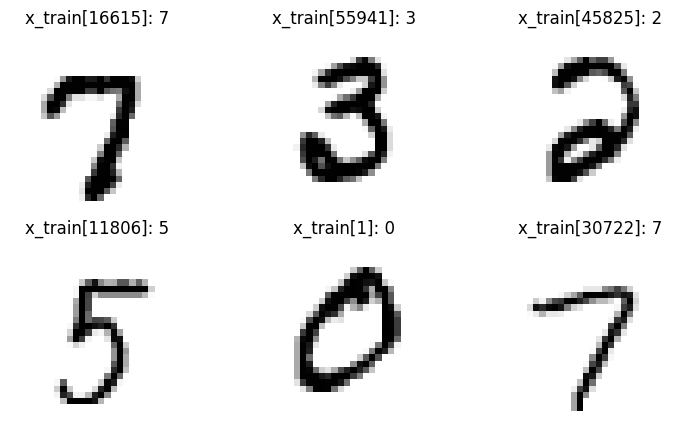

In [9]:
n = 6

# np.random.seed(17) # Set a seeds for the random number generator
random_idx = np.random.choice(len(x_train),n)
x_train_sample, y_train_sample = x_train[random_idx], y_train[random_idx]

fig = plt.figure(figsize=(9,5))

for i in range(n):
    ax = plt.subplot(math.ceil(n/3),3, i+1)
    ax.imshow(x_train_sample[i],cmap='gray_r')
    ax.axis('off')
    ax.set_title(f'x_train[{random_idx[i]}]: {y_train_sample[i]}',fontsize=12)
    
plt.subplots_adjust(hspace=0.2)
plt.show()

- To prepare the data for our model, we flatten each 28x28 image into a vector of size 784.

In [10]:
x_train = x_train.reshape(len(x_train),np.prod(x_train.shape[1:]))
x_test = x_test.reshape(len(x_test),np.prod(x_test.shape[1:]))

print(f' Train set: {x_train.shape} \n Test set: {x_test.shape}')

 Train set: (60000, 784) 
 Test set: (10000, 784)


## Building the autoencoder

An autoencoder architecture consists on:

   - **Encoder:** dense, deep neural network trained to transform the input data into a low-dimensional latent space.
   
   
   - **Decoder:** dense, deep neural network trained to reconstruct the original data from its lower-dimensional representation.

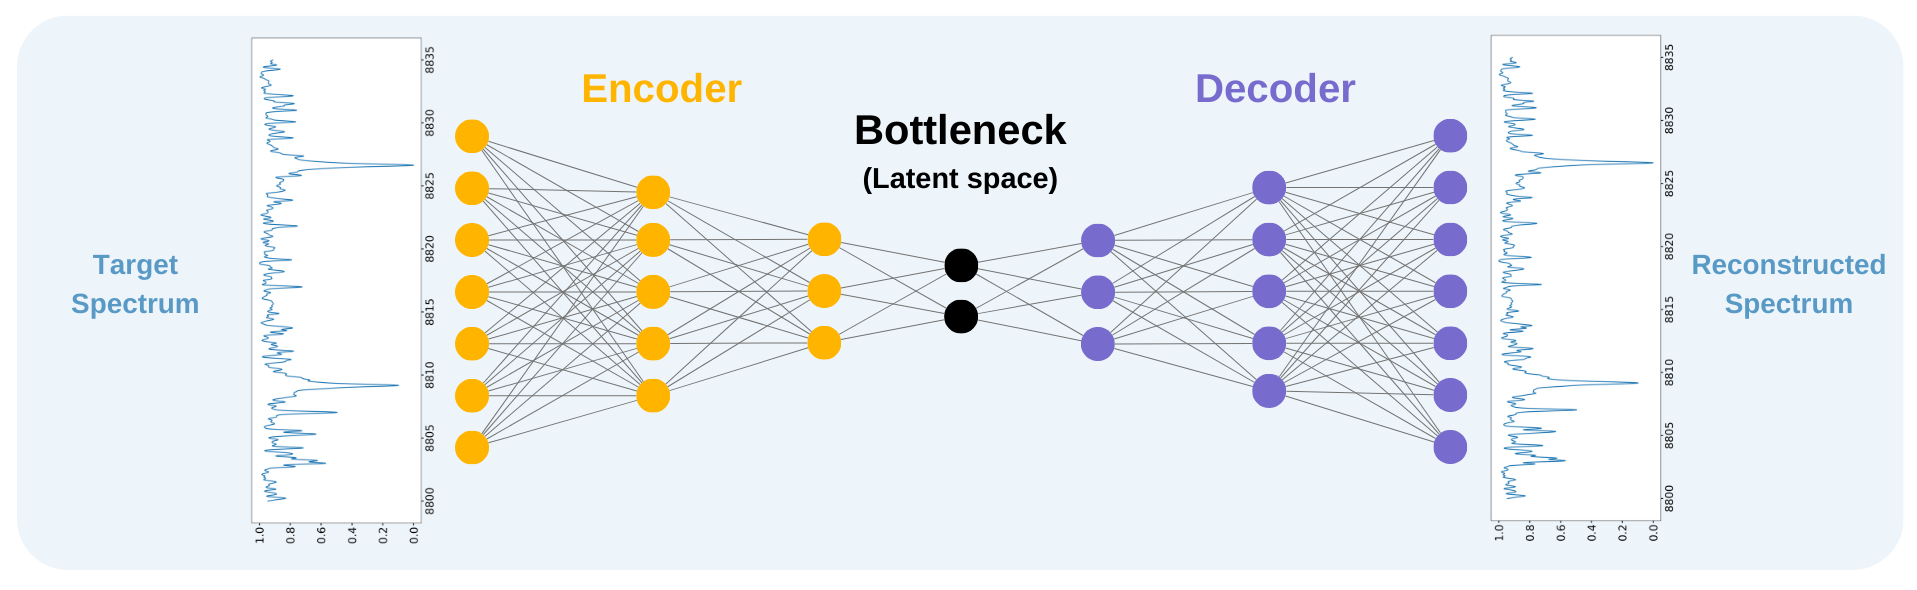

In [11]:
Image('autoencoder_cut.png')

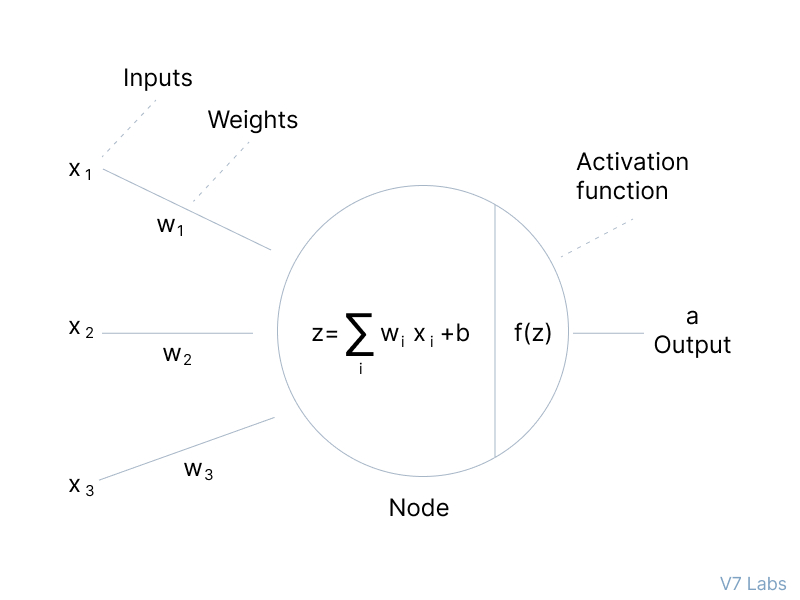

In [12]:
Image('ann_node.jpg',width=700)

- This is how we build artificial neural networks in Python, using the ``keras.layers`` module:

In [33]:
# We define the sequence of layers

input_l = Input(shape=(784,),name='input_l')

encoded_l1 = Dense(128, activation='relu', name='encoded_1',activity_regularizer=regularizers.l1(1e-8))(input_l) 
encoded_l2 = Dense(64, activation='relu', name='encoded_2', activity_regularizer=regularizers.l1(1e-8))(encoded_l1)

bottleneck = Dense(32, activation='relu', name='bottleneck')(encoded_l2)

decoded_l1 = Dense(64, activation='relu', name='decoded_1', activity_regularizer=regularizers.l1(1e-8))(bottleneck)
decoded_l2 = Dense(128, activation='relu', name='decoded_2', activity_regularizer=regularizers.l1(1e-8))(decoded_l1)

output_l = Dense(784, activation='sigmoid', name='output_l')(decoded_l2)

# We define the model with the corresponding input and output layers

ac = Model(input_l,output_l)
ec = Model(input_l,bottleneck)

- With the method ``.summary()``, we can double-check the model built.

In [34]:
ac.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_l (InputLayer)        [(None, 784)]             0         
                                                                 
 encoded_1 (Dense)           (None, 128)               100480    
                                                                 
 encoded_2 (Dense)           (None, 64)                8256      
                                                                 
 bottleneck (Dense)          (None, 32)                2080      
                                                                 
 decoded_1 (Dense)           (None, 64)                2112      
                                                                 
 decoded_2 (Dense)           (None, 128)               8320      
                                                                 
 output_l (Dense)            (None, 784)               1011

In [35]:
ec.summary()

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_l (InputLayer)        [(None, 784)]             0         
                                                                 
 encoded_1 (Dense)           (None, 128)               100480    
                                                                 
 encoded_2 (Dense)           (None, 64)                8256      
                                                                 
 bottleneck (Dense)          (None, 32)                2080      
                                                                 
Total params: 110816 (432.88 KB)
Trainable params: 110816 (432.88 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


- Before training the model, we have to configure it using the method ``.compile()``, which is used to set the loss function and the [optimization algorithm](https://towardsdatascience.com/optimizers-for-training-neural-network-59450d71caf6#:~:text=Adam%20is%20the%20best%20optimizers,optimizers%20with%20dynamic%20learning%20rate.).


- Once the model, is configured, we can train it with the ``.fit()`` method.

In [36]:
ac.compile(loss='mse',optimizer='adam')

history = ac.fit(x_train,x_train,
                epochs=30,
                verbose=1,
                batch_size=128,
                validation_split=0.2) 

Epoch 1/30
375/375 [==============================] - 3s 7ms/step - loss: 0.0543 - val_loss: 0.0314
Epoch 2/30
375/375 [==============================] - 2s 6ms/step - loss: 0.0260 - val_loss: 0.0224
Epoch 3/30
375/375 [==============================] - 2s 6ms/step - loss: 0.0205 - val_loss: 0.0192
Epoch 4/30
375/375 [==============================] - 2s 6ms/step - loss: 0.0181 - val_loss: 0.0173
Epoch 5/30
375/375 [==============================] - 2s 6ms/step - loss: 0.0165 - val_loss: 0.0159
Epoch 6/30
375/375 [==============================] - 2s 6ms/step - loss: 0.0153 - val_loss: 0.0149
Epoch 7/30
375/375 [==============================] - 2s 6ms/step - loss: 0.0143 - val_loss: 0.0141
Epoch 8/30
375/375 [==============================] - 2s 6ms/step - loss: 0.0135 - val_loss: 0.0133
Epoch 9/30
375/375 [==============================] - 2s 6ms/step - loss: 0.0128 - val_loss: 0.0127
Epoch 10/30
375/375 [==============================] - 2s 6ms/step - loss: 0.0123 - val_loss: 0.0123

- We can plot the **training loss** and **validation loss** evolution, which are stored in the model ``history`` attribute, to see their evolution during the training process and confirm that they properly converge.

In [37]:
loss = history.history['loss']
val_loss = history.history['val_loss']

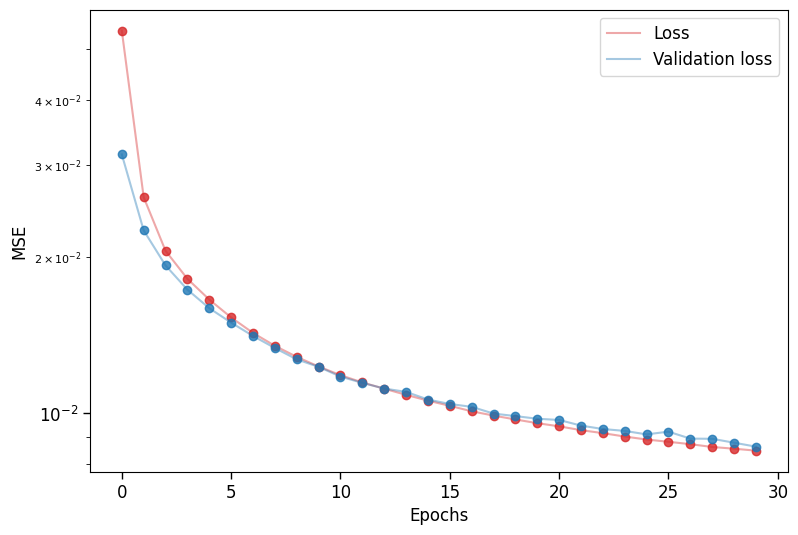

In [38]:
fig, ax = plt.subplots(figsize=(9,6))

ax.set_ylabel('MSE',fontsize=12)
ax.set_xlabel('Epochs',fontsize=12)
ax.tick_params(axis='both', which='major', labelsize=12,width=1,length=5)
ax.tick_params(axis='both', which='minor', labelsize=8, length=3)
ax.set_yscale('log')

ax.plot(loss,color='tab:red',alpha=0.4,label='Loss')
ax.plot(loss,'.',color='tab:red',alpha=0.8,markersize=12)

ax.plot(val_loss,color='tab:blue',alpha=0.4,label='Validation loss')
ax.plot(val_loss,'.',color='tab:blue',alpha=0.8,markersize=12)

plt.legend(fontsize=12)
plt.show()

## Visualization of the reconstructed digits

Now that we have trained the autoencoder, it is time to check the reconstructed images. We can also have a look at the compressed representations provided by the encoder (we reshape them to 4x8 for visualization purposes).

- To obtain a model prediction, we use the module ``.predict()``. Below, we get the predictions for both the encoder and the autoencoder models, since we want to keep both the reconstructed images and the low-dimensional representations.

In [39]:
encoded_imgs = ec.predict(x_test)
predicted_imgs = ac.predict(x_test)

313/313 [==============================] - 1s 2ms/step


- Here, we evaluate the reconstruction error of the autoencoder on the test set, which is data that the model has not seen so far

In [40]:
mean_squared_error(x_test,predicted_imgs)

0.00826231820676472

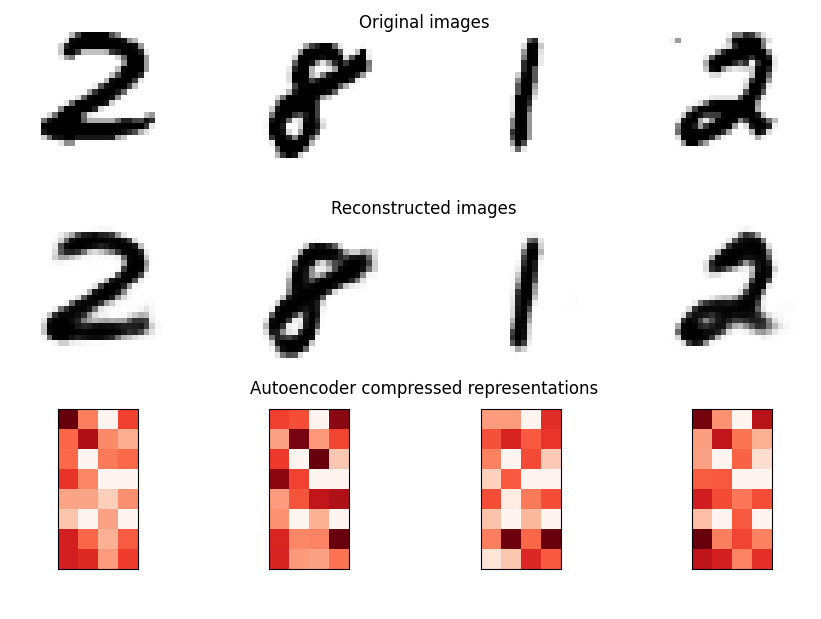

In [52]:
random_idx = np.random.choice(len(x_test),4)
x_test_sample, predicted_sample, encoded_sample = x_test[random_idx], predicted_imgs[random_idx], encoded_imgs[random_idx]

fig = plt.figure(figsize=(9,6))

subfigs = fig.subfigures(nrows=3, ncols=1)

subfigs[0].suptitle('Original images',fontsize=12,x=0.46)

axs1 = subfigs[0].subplots(nrows=1, ncols=4)

for i in range(4):
    axs1[i].imshow(x_test_sample[i].reshape(28,28),cmap='gray_r')
    axs1[i].axis('off')

subfigs[1].suptitle('Reconstructed images',fontsize=12,x=0.46,y=1.05)

axs2 = subfigs[1].subplots(nrows=1, ncols=4)

for i in range(4):
    axs2[i].imshow(predicted_sample[i].reshape(28,28),cmap='gray_r')
    axs2[i].axis('off')

subfigs[2].suptitle('Autoencoder compressed representations',fontsize=12,x=0.46,y=1.15)

axs3 = subfigs[2].subplots(nrows=1, ncols=4)

for i in range(4):
    axs3[i].imshow(encoded_sample[i].reshape(8,4),cmap='Reds')
    axs3[i].get_xaxis().set_visible(False)
    axs3[i].get_yaxis().set_visible(False)    
    
plt.subplots_adjust(left=0,bottom=0.2,top=1)
plt.show()